<p><font size="6"><b>Xarray intro</b></font></p>


> *DS Python for GIS and Geoscience*  
> *September, 2023*
>
> *© 2023, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

> *Adapted in 2024 for the course 'Computational Physics' by Wout Dewettinck*
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Introduction

In [2]:
import xarray as xr

In [6]:
ds = xr.open_dataset("../data/baseline_2021071100_144_tas_2021-07-11T01_2021-07-17T00_3600_regridded.nc", engine="netcdf4")
temperature_data = ds.tas
temperature_data

<xarray.DataArray 'tas' (time: 144, lat: 70, lon: 75)>
[756000 values with dtype=float32]
Coordinates:
  * time      (time) datetime64[ns] 2021-07-11T01:00:00 ... 2021-07-17
  * lon       (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat       (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    height    float64 ...
    crs       int64 ...
    rstart    <U10 ...
    run_name  <U8 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          Kelvin
    cell_methods:   time: point

Let's start with some temperature data from a simulation:

In [ ]:
ds = xr.open_dataset("../data/baseline_2021071100_144_tas_2021-07-11T01_2021-07-17T00_3600_regridded.nc", engine="netcdf4")
temperature_data = ds.tas

We can print information about this variable by simply running a cell with the variable name. Explore the data a bit by clicking on the buttons. The next cells will help you along.

In [7]:
temperature_data

<xarray.DataArray 'tas' (time: 144, lat: 70, lon: 75)>
[756000 values with dtype=float32]
Coordinates:
  * time      (time) datetime64[ns] 2021-07-11T01:00:00 ... 2021-07-17
  * lon       (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat       (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    height    float64 ...
    crs       int64 ...
    rstart    <U10 ...
    run_name  <U8 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          Kelvin
    cell_methods:   time: point

The variable `temperature_data` in an `xarray.DataArray`. It is similar to a Numpy array, but additionally its contains coordinate information, labeled dimensions and attributes. We can see the shape of this DataArray by running `.shape`, similarly to Numpy:

In [10]:
temperature_data.shape

(144, 70, 75)

We can find the coordinates of this DataArray by running `.coords`. The coordinates with an asterisk in front of them are also dimensions.  Dimensions prescribe the shape of the array. 

In [11]:
temperature_data.coords

Coordinates:
  * time      (time) datetime64[ns] 2021-07-11T01:00:00 ... 2021-07-17
  * lon       (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat       (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    height    float64 ...
    crs       int64 ...
    rstart    <U10 ...
    run_name  <U8 ...

We can see that this DataArray has three dimensions: time, lat and lon. We can find more information about, for example, the time dimension by running `temperature_data.time`. Do this for the other dimensions as well.

In [14]:
temperature_data.time

<xarray.DataArray 'time' (time: 144)>
array(['2021-07-11T01:00:00.000000000', '2021-07-11T02:00:00.000000000',
       '2021-07-11T03:00:00.000000000', '2021-07-11T04:00:00.000000000',
       '2021-07-11T05:00:00.000000000', '2021-07-11T06:00:00.000000000',
       '2021-07-11T07:00:00.000000000', '2021-07-11T08:00:00.000000000',
       '2021-07-11T09:00:00.000000000', '2021-07-11T10:00:00.000000000',
       '2021-07-11T11:00:00.000000000', '2021-07-11T12:00:00.000000000',
       '2021-07-11T13:00:00.000000000', '2021-07-11T14:00:00.000000000',
       '2021-07-11T15:00:00.000000000', '2021-07-11T16:00:00.000000000',
       '2021-07-11T17:00:00.000000000', '2021-07-11T18:00:00.000000000',
       '2021-07-11T19:00:00.000000000', '2021-07-11T20:00:00.000000000',
       '2021-07-11T21:00:00.000000000', '2021-07-11T22:00:00.000000000',
       '2021-07-11T23:00:00.000000000', '2021-07-12T00:00:00.000000000',
       '2021-07-12T01:00:00.000000000', '2021-07-12T02:00:00.000000000',
       '2021-07-12T03:00:00.000000000', '2021-07-12T04:00:00.000000000',
       '2021-07-12T05:00:00.000000000', '2021-07-12T06:00:00.000000000',
       '2021-07-12T07:00:00.000000000', '2021-07-12T08:00:00.000000000',
       '2021-07-12T09:00:00.000000000', '2021-07-12T10:00:00.000000000',
       '2021-07-12T11:00:00.000000000', '2021-07-12T12:00:00.000000000',
       '2021-07-12T13:00:00.000000000', '2021-07-12T14:00:00.000000000',
       '2021-07-12T15:00:00.000000000', '2021-07-12T16:00:00.000000000',
       '2021-07-12T17:00:00.000000000', '2021-07-12T18:00:00.000000000',
       '2021-07-12T19:00:00.000000000', '2021-07-12T20:00:00.000000000',
       '2021-07-12T21:00:00.000000000', '2021-07-12T22:00:00.000000000',
       '2021-07-12T23:00:00.000000000', '2021-07-13T00:00:00.000000000',
       '2021-07-13T01:00:00.000000000', '2021-07-13T02:00:00.000000000',
       '2021-07-13T03:00:00.000000000', '2021-07-13T04:00:00.000000000',
       '2021-07-13T05:00:00.000000000', '2021-07-13T06:00:00.000000000',
       '2021-07-13T07:00:00.000000000', '2021-07-13T08:00:00.000000000',
       '2021-07-13T09:00:00.000000000', '2021-07-13T10:00:00.000000000',
       '2021-07-13T11:00:00.000000000', '2021-07-13T12:00:00.000000000',
       '2021-07-13T13:00:00.000000000', '2021-07-13T14:00:00.000000000',
       '2021-07-13T15:00:00.000000000', '2021-07-13T16:00:00.000000000',
       '2021-07-13T17:00:00.000000000', '2021-07-13T18:00:00.000000000',
       '2021-07-13T19:00:00.000000000', '2021-07-13T20:00:00.000000000',
       '2021-07-13T21:00:00.000000000', '2021-07-13T22:00:00.000000000',
       '2021-07-13T23:00:00.000000000', '2021-07-14T00:00:00.000000000',
       '2021-07-14T01:00:00.000000000', '2021-07-14T02:00:00.000000000',
       '2021-07-14T03:00:00.000000000', '2021-07-14T04:00:00.000000000',
       '2021-07-14T05:00:00.000000000', '2021-07-14T06:00:00.000000000',
       '2021-07-14T07:00:00.000000000', '2021-07-14T08:00:00.000000000',
       '2021-07-14T09:00:00.000000000', '2021-07-14T10:00:00.000000000',
       '2021-07-14T11:00:00.000000000', '2021-07-14T12:00:00.000000000',
       '2021-07-14T13:00:00.000000000', '2021-07-14T14:00:00.000000000',
       '2021-07-14T15:00:00.000000000', '2021-07-14T16:00:00.000000000',
       '2021-07-14T17:00:00.000000000', '2021-07-14T18:00:00.000000000',
       '2021-07-14T19:00:00.000000000', '2021-07-14T20:00:00.000000000',
       '2021-07-14T21:00:00.000000000', '2021-07-14T22:00:00.000000000',
       '2021-07-14T23:00:00.000000000', '2021-07-15T00:00:00.000000000',
       '2021-07-15T01:00:00.000000000', '2021-07-15T02:00:00.000000000',
       '2021-07-15T03:00:00.000000000', '2021-07-15T04:00:00.000000000',
       '2021-07-15T05:00:00.000000000', '2021-07-15T06:00:00.000000000',
       '2021-07-15T07:00:00.000000000', '2021-07-15T08:00:00.000000000',
       '2021-07-15T09:00:00.000000000', '2021-07-15T10:00:00.000000000',
       '2021-07-15T11:00:00.000000000', '2021-07-15T12:00:00.000000000',
       '2021-07-15T1

The data type of this `xarray.DataArray` `temperature_data` is 'float32'. Xarray uses the data types provided by Numpy. More information on the data types NumPy supports is available in the [documentation](https://numpy.org/devdocs/user/basics.types.html#array-types-and-conversions-between-types).

Converting to another data type is supported by `astype()` method:

In [9]:
temperature_data.astype('float64')   # .nbytes

<xarray.DataArray 'tas' (time: 144, lat: 70, lon: 75)>
array([[[287.70495605, 288.05322266, 287.97457886, ..., 288.40097046,
         288.2940979 , 288.14199829],
        [287.70812988, 288.09268188, 287.99871826, ..., 288.35809326,
         288.28939819, 288.01394653],
        [287.52597046, 287.69699097, 287.67428589, ..., 288.44195557,
         288.41113281, 288.0378418 ],
        ...,
        [288.47463989, 288.44000244, 288.38485718, ..., 289.17959595,
         289.12536621, 289.03994751],
        [288.41470337, 288.35610962, 288.29824829, ..., 289.18023682,
         289.1383667 , 289.09072876],
        [288.32843018, 288.28601074, 288.25732422, ..., 289.26248169,
         289.22528076, 289.15545654]],

       [[286.51757812, 286.98675537, 286.95153809, ..., 287.63812256,
         287.53930664, 287.39590454],
        [286.57598877, 287.17022705, 287.06234741, ..., 287.55776978,
         287.49459839, 287.26443481],
        [286.27584839, 286.53155518, 286.51275635, ..., 287.57092285,
         287.57980347, 287.28164673],
...
        [288.93612671, 288.89868164, 288.8503418 , ..., 290.4760437 ,
         290.48394775, 290.42221069],
        [288.88751221, 288.82479858, 288.78079224, ..., 290.54449463,
         290.53045654, 290.47344971],
        [288.8168335 , 288.77218628, 288.74151611, ..., 290.61123657,
         290.60372925, 290.52029419]],

       [[287.65881348, 287.99057007, 287.97344971, ..., 289.47695923,
         289.37460327, 289.19384766],
        [287.38964844, 287.89898682, 287.86419678, ..., 289.51159668,
         289.47000122, 289.23562622],
        [287.17663574, 287.35852051, 287.41586304, ..., 289.64419556,
         289.50476074, 289.21035767],
        ...,
        [288.86502075, 288.8331604 , 288.79058838, ..., 290.18139648,
         290.17199707, 290.10232544],
        [288.81686401, 288.75494385, 288.7086792 , ..., 290.20489502,
         290.17648315, 290.12133789],
        [288.74276733, 288.70111084, 288.66870117, ..., 290.23788452,
         290.20703125, 290.12161255]]])
Coordinates:
  * time      (time) datetime64[ns] 2021-07-11T01:00:00 ... 2021-07-17
  * lon       (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat       (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    height    float64 ...
    crs       int64 ...
    rstart    <U10 ...
    run_name  <U8 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          Kelvin
    cell_methods:   time: point

Using xarray:

- Data stored as a NumPy arrays.
- Dimensions do have a name.
- The coordinates of each of the dimensions can represent geographical coordinates, categories, dates, ... instead of just an index.

**REMEMBER**:

The [`xarray` package](xarray.pydata.org/en/stable/) introduces __labels__ in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays. Xarray is inspired by and borrows heavily from Pandas.   

## Selecting data

Xarray’s labels make working with multidimensional data much easier.

We could use the Numpy style of data slicing:

In [15]:
temperature_data[0]

<xarray.DataArray 'tas' (lat: 70, lon: 75)>
[5250 values with dtype=float32]
Coordinates:
    time      datetime64[ns] 2021-07-11T01:00:00
  * lon       (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat       (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    height    float64 ...
    crs       int64 ...
    rstart    <U10 ...
    run_name  <U8 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          Kelvin
    cell_methods:   time: point

However, it is often much more powerful to use xarray’s `.sel()` method to use label-based indexing, making the selection more declarative:

In [16]:
temperature_data.sel(time="2021-07-11T01")

<xarray.DataArray 'tas' (lat: 70, lon: 75)>
[5250 values with dtype=float32]
Coordinates:
    time      datetime64[ns] 2021-07-11T01:00:00
  * lon       (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat       (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    height    float64 ...
    crs       int64 ...
    rstart    <U10 ...
    run_name  <U8 ...
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          Kelvin
    cell_methods:   time: point

We can select a specific set of coordinate values as a __list__ and take the value that is most near to the given value:

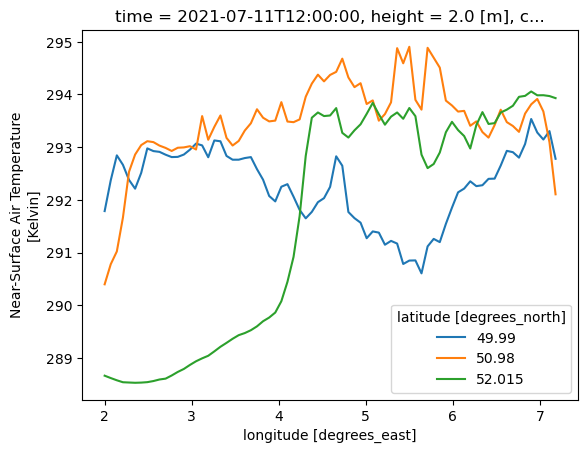

In [30]:
temperature_data.sel(lat=[50.0, 51.0, 52.0], method="nearest").sel(time="2021-07-11T12").plot.line(hue="lat");

Sometimes, a specific range is required. The `.sel()` method also supports __slicing__, so we can select the green band and slice a subset of the data along the x direction:

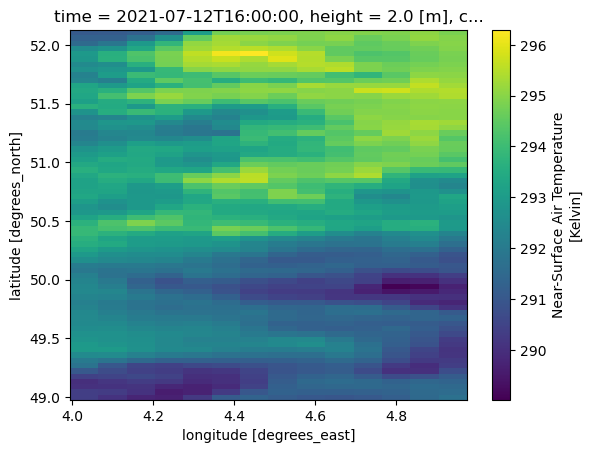

In [20]:
temperature_data.sel(lon=slice(4, 5), time="2021-07-12T16").plot.imshow()

The __positional indexing__ as you would do with the underlying Numpy array is still possible as well:

In [23]:
temperature_data[0, 30:60:3, 30:60:4]

<xarray.DataArray 'tas' (lat: 10, lon: 8)>
[80 values with dtype=float32]
Coordinates:
    time      datetime64[ns] 2021-07-11T01:00:00
  * lon       (lon) float64 4.1 4.38 4.66 4.94 5.22 5.5 5.78 6.06
  * lat       (lat) float64 50.35 50.48 50.62 50.76 ... 51.16 51.3 51.43 51.56
    height    float64 2.0
    crs       int64 0
    rstart    <U10 '2021071100'
    run_name  <U8 'baseline'
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          Kelvin
    cell_methods:   time: point

Use a __condition__ to select data, also called fancy indexing or boolean indexing:

In [25]:
temperature_data > 288

<xarray.DataArray 'tas' (time: 144, lat: 70, lon: 75)>
array([[[False,  True, False, ...,  True,  True,  True],
        [False,  True, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])
Coordinates:
  * time      (time) datetime64[ns] 2021-07-11T01:00:00 ... 2021-07-17
  * lon       (lon) float64 2.0 2.07 2.14 2.21 2.28 ... 6.9 6.97 7.04 7.11 7.18
  * lat       (lat) float64 49.0 49.05 49.09 49.13 ... 51.97 52.02 52.06 52.1
    height    float64 2.0
    crs       int64 0
    rstart    <U10 '2021071100'
    run_name  <U8 'baseline'

However, with xarray we cannot use a mask like this to directly filter the array or assign new values. 

One typical use case for raster data is where you want to apply a mask to the data and set those values to some "NODATA" value. For plotting, this can for example be `np.nan`, and for this we can use the `where()` method:

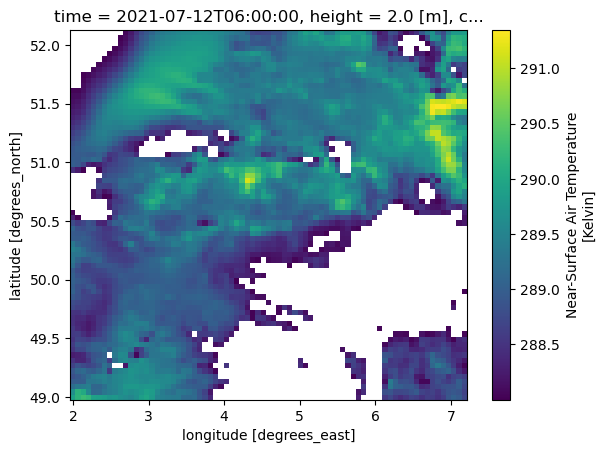

In [27]:
temperature_data.where(temperature_data > 288).sel(time="2021-07-12T06").plot.imshow()

### Let's practice!

## Plotting

We already used `.plot.imshow` and `.plot.line` in the previous section. `xarray` has a `plot` method, which can be used for different plot types.

It supports both 2 dimensional (e.g. line) as 3 (e.g. imshow, pcolormesh) dimensional plots. When just using `plot`, xarray will do a _best guess_ on how to plot the data. However being explicit `plot.line`, `plot.imshow`, `plot.pcolormesh`, `plot.scatter`,...  gives you more control.

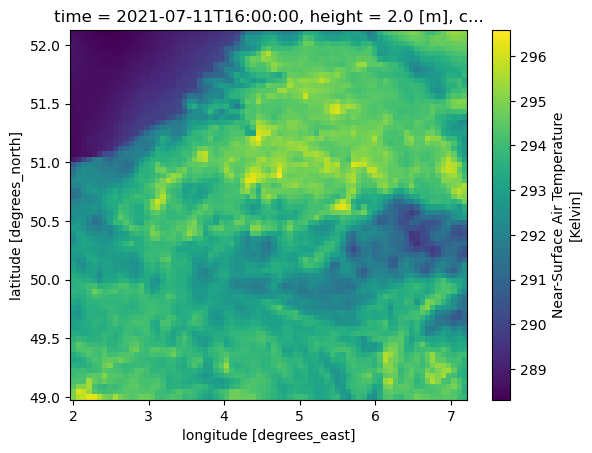

In [32]:
temperature_data.sel(time="2021-07-11T16").plot();  # add .line() -> ValueError: For 2D inputs, please specify either hue, x or y.

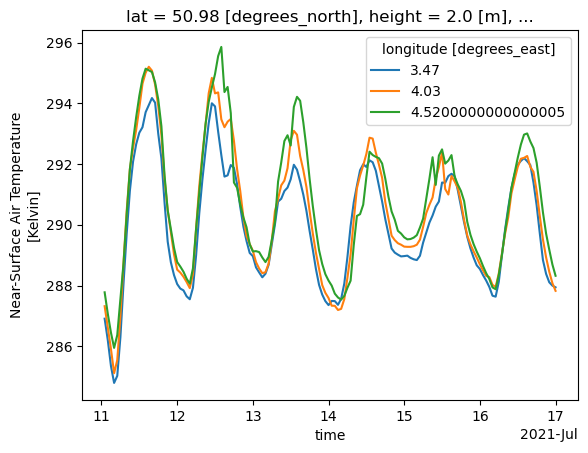

In [34]:
temperature_data.sel(lat=51.0, lon=[3.5, 4.0, 4.5], method="nearest").plot.line(hue="lon");

"facetting" splits the data in subplots according to a dimension, e.g. `time`

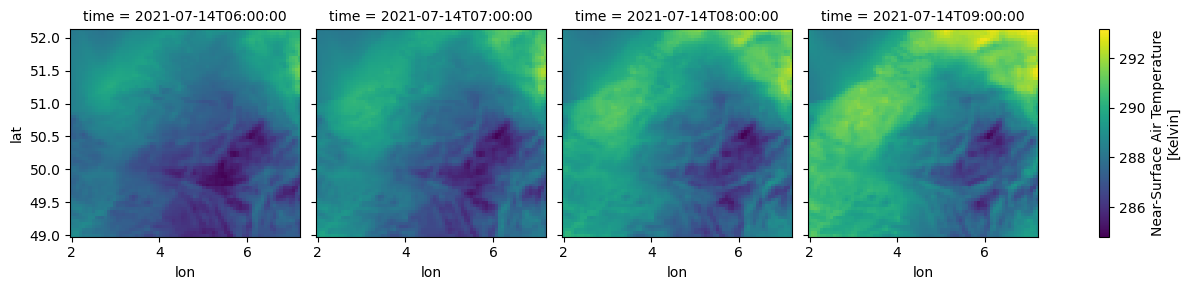

In [36]:
temperature_data.sel(time=slice("2021-07-14T06", "2021-07-14T09")).plot.imshow(col="time");

Facetting also works for line plots:

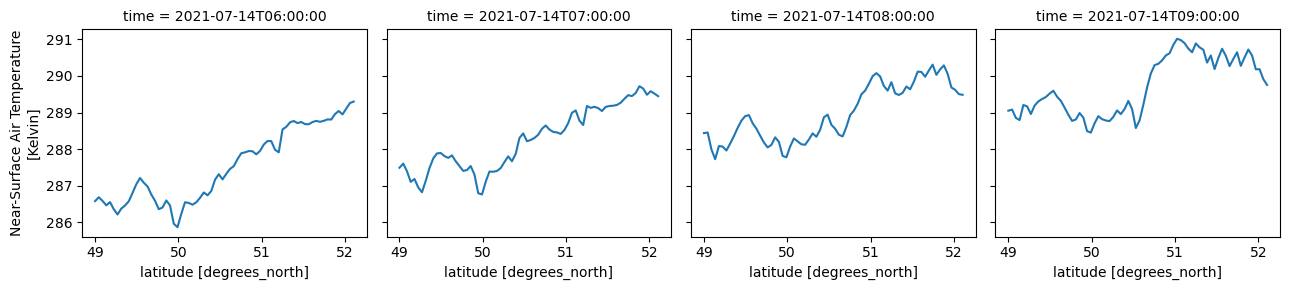

In [40]:
temperature_data.sel(lon=4.2, method="nearest").sel(time=slice("2021-07-14T06", "2021-07-14T09")).plot.line(col="time");  # row="band"

Use the `robust` option when there is a lack of visual difference. This will use the 2nd and 98th percentiles of the data to compute the color limits. The arrows on the color bar indicate that the colors include data points outside the bounds.

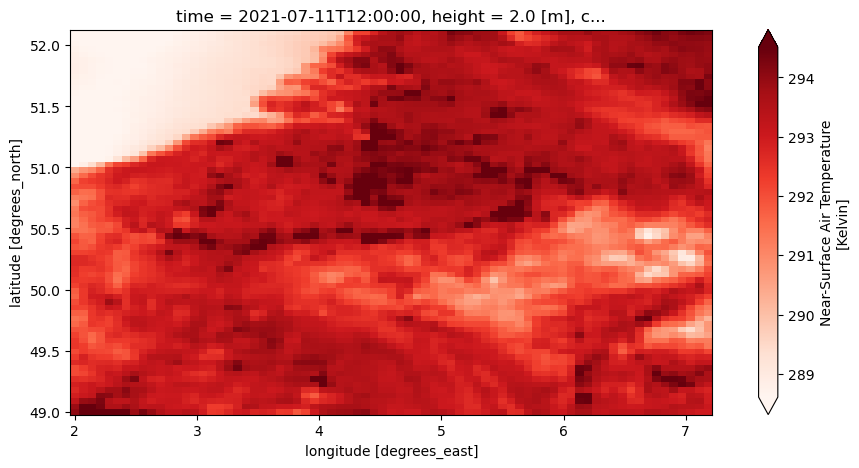

In [43]:
ax = temperature_data.sel(time="2021-07-11T12").plot(cmap="Reds", robust=True, figsize=(12, 5))  # use False as well
ax.axes.set_aspect('equal')

In case you want to show the output with a __discrete colormap__, one can define a [set of levels to split the colormap](http://xarray.pydata.org/en/stable/user-guide/plotting.html#discrete-colormaps) on:

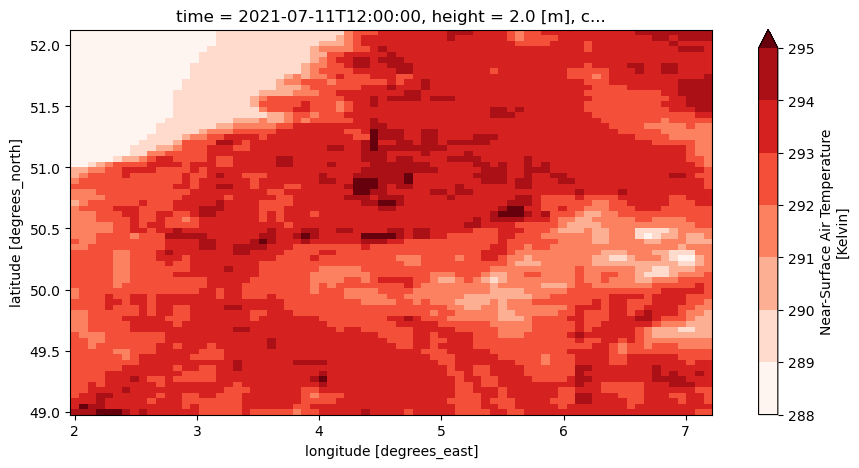

In [44]:
ax = temperature_data.sel(time="2021-07-11T12").plot(cmap="Reds", levels=[288, 289, 290, 291, 292, 293, 294, 295], figsize=(12, 5))  # plot without these levels
ax.axes.set_aspect('equal')

For more control, defining the `Figure` and `Axes` Matplotlib object first provides more flexibility in terms of further adjustments. One can pass an `axes` object to an xarray `.plot` method in order to link the output:

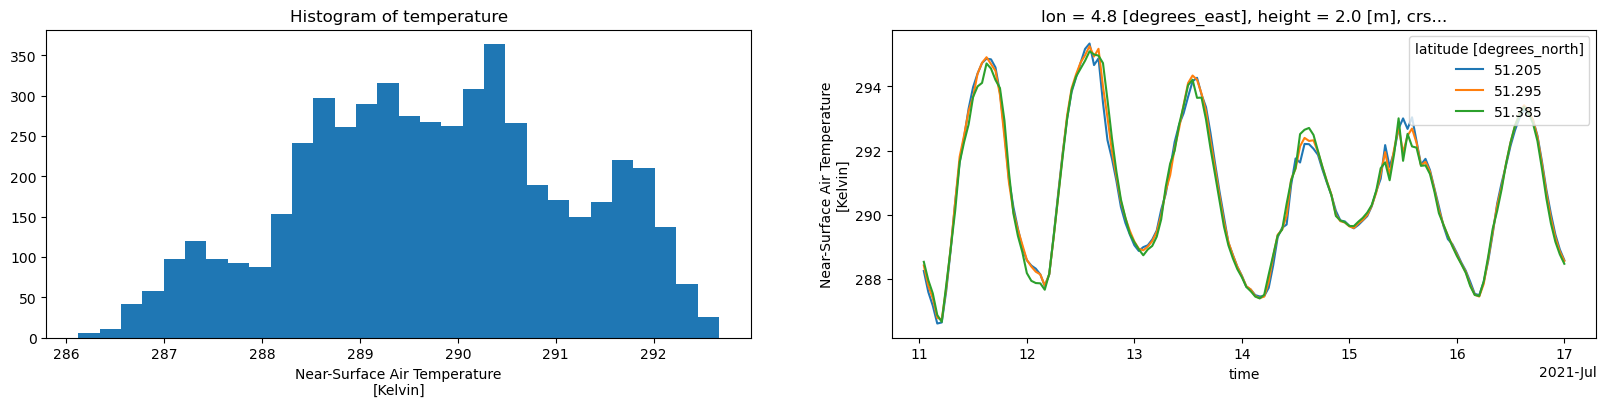

In [47]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 4))

# first subplot a histogram of temperature at 2021-07-13T08
temperature_data.sel(time="2021-07-13T08").plot.hist(bins=30, ax=ax0);
ax0.set_title("Histogram of temperature");

# second subplot a line plot at given longitude
temperature_data.sel(lon=4.8, lat=[51.2, 51.3, 51.4], method="nearest").plot.line(hue="lat", ax=ax1);

## Reductions, element-wise calculations and broadcasting

In [ ]:
herstappe = xr.open_dataarray(herstappe_file, engine="rasterio")
herstappe = herstappe.assign_coords(band=("band", ["red", "green", "blue"]))
herstappe_red = herstappe.sel(band="red")

### Reductions

The __reductions__ (aggregations) are provided as methods and can be applied along one or more of the data dimensions.

By default, the array is reduced over all dimensions, returning a single value as a DataArray:

In [ ]:
herstappe_red.mean()

In NumPy, the dimensions are called the __axis__:

In [ ]:
herstappe_red.mean(axis=1)

But we have __dimensions with labels__, so rather than performing reductions on axes (as in NumPy), we can perform them on __dimensions__. This turns out to be convenient and declarative:

In [ ]:
herstappe_red.mean(dim="x")

Calculate the mean values for each of the bands separately:

In [ ]:
herstappe.mean(dim=["x", "y"])  # read as: 'take the mean over the dimensions x and y combined'

Or some quantiles:

In [ ]:
herstappe.quantile([0.1, 0.5, 0.9], dim=["x", "y"])

### Element-wise computations

The __for each element__ is crucial for NumPy and Xarray. The typical answer in programming would be a `for`-loop, but Numpy is optimized to do these calculations __element-wise__ (i.e. for all elements together):

In [ ]:
dummy = np.arange(1, 10)
dummy

In [ ]:
dummy*10

Instead of:

In [ ]:
[el*20 for el in dummy]

Numpy provides most of the familiar arithmetic operators to apply on an element-by-element basis:

In [ ]:
np.exp(dummy), np.sin(dummy), dummy**2, np.log(dummy)

Xarray works seamlessly with those arithmetic operators and numpy array functions.

In [ ]:
herstappe_red * 10.

In [ ]:
np.log(herstappe_red)

We can combine multiple xarray arrays in arithemetic operations:

In [ ]:
herstappe.sel(band="red") - herstappe.sel(band="green")

### Broadcasting

When we combine arrays with different shapes during arithmetic operations, NumPy and Xarray apply a set of __broadcoasting__ rules and the smaller array is _broadcast_ across the larger array so that they have compatible shapes. 

Perfoming an operation on arrays with different coordinates will result in automatic broadcasting:

In [ ]:
herstappe.x.shape, herstappe_red.shape

In [ ]:
herstappe_red + herstappe.x  # Note, this calculaton does not make much sense, but illustrates broadcasting

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

The combination of element-wise calculations, efficient reductions and broadcasting provides NumPy and Xarray a lot of power. In general, it is a good advice to __avoid for loops__ when working with arrays.

</div>

### Let's practice!

<div class="alert alert-success">

**EXERCISE 5**:

The data set `./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` (assign to variable `herstappe_data`) has values ranging in between 0.11325, 0.8575. To improve the quality of the visualization, stretch __each of the layers individually__ to the values to the range 0. to 1. with a linear transformation: 
    
$$z_{i,scaled}=\frac{z_i-\min(z)}{\max(z)-\min(z)}$$

Make a plot of the end result and compare with a plot of the original data. 

<details><summary>Hints</summary>

* We ask to do it *"for each of the bands"*, but you don't need to do it separately for each band! Using broadcasting and element-wise operations, we can do this in one go.
* First calculate the minimum and maximum value for the bands (i.e. reducing over the other (x, y) dimensions). This should result in an 1D array of length 3.
* With those min/max arrays, you can add and subtract those from the original `herstappe_data` array to obtain the scaled data.

</details>    
    
</div>

In [ ]:
herstappe_data = xr.open_dataarray("./data/herstappe/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff", 
                                   engine="rasterio")

In [ ]:
# %load _solutions/11-xarray-intro15.py

In [ ]:
# %load _solutions/11-xarray-intro16.py

In [ ]:
# %load _solutions/11-xarray-intro17.py

<div class="alert alert-success">

**EXERCISE 6**:

The true color data set for Ghent `./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff` contains 3 bands. Plotting with the `imshow` function can plot 3-D (RGB) data sets, but when running `gent.plot.imshow()`, we get an error. This is because matplotlib expects data in the range of [0..1] for floats or [0..255] for integers. 
    
The data type of this specific array `gent` is 16bit unsigned integer. Detailed info on data types is out of scope of this course, but remember that using 16bit unsigned integer, it can contain `2**16` different (all positive) integer values to represent the data range (in this case 0 to 1):

```
>>> 2**16
65536
```

In this excercise, we will convert the data to floats within the data range 0 -> 1 so we can plot it as RGB values.

- Read the data file and assign to a variable `gent`.
- Try to plot it with the `imshow()` method.
- Convert the array to a float array and call it `gent_f`.
- Now divide the array by 65536 to get our data in a [0-1] range.
- Plot the result with the `imshow()` method.

<details><summary>Hints</summary>

* To convert the data type of an array, you can use the `astype()` method. In this case you might as well opt to have the `mask_and_scale=true` as this will do the float conversion already.
* Masking out part of the data based on a condition can be done with the `where()` method.

</details>    
    
</div>

In [ ]:
# %load _solutions/11-xarray-intro18.py

In [ ]:
# %load _solutions/11-xarray-intro19.py

In [ ]:
# %load _solutions/11-xarray-intro20.py

In [ ]:
# %load _solutions/11-xarray-intro21.py

In [ ]:
# %load _solutions/11-xarray-intro22.py

<div class="alert alert-success">

**EXERCISE 7**:

Next, plot a greyscale version of the data as well. Instead of using a custom function just rely on the sum of the 3 bands as a quick proxy.
    
<details><summary>Hints</summary>

* A greyscale image requires a greyscale `cmap`, check the available names in [the documentation online](https://matplotlib.org/tutorials/colors/colormaps.html)
* Xarray provides the common aggregation functions as methods to a DataArray, e.g. `my_array.sum(...)`
* To do a reduction over a given dimension, use the `dim`-ension name as parameter of the method.

</details>    
    
</div>

In [ ]:
# %load _solutions/11-xarray-intro23.py

<div class="alert alert-success">

**EXERCISE 8**:

The data sets `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` and `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B08.tiff` contain respectively the 4th and the 8th band of a sentinel satellite image. To derive the [Normalized Difference Vegetation Index) (NDVI)](https://nl.wikipedia.org/wiki/Normalized_Difference_Vegetation_Index), the two bands need to be combined as follows:
    
$$\frac{band_8 - band_4}{band_8 + band_4} $$
    
Process the images and create a plot of the NDVI:
    
- Read both data sets and store them in resp. `b4_data` and `b8_data`. 
- Transform the data range of each of the layers to the range .0 - 1.
- Calculate the NDVI
- Make a plot of the NDVI plot the data as such using the "Greens" colormap. 

__IMPROVE THE COLORMAP__
    
Using these default plot settings, the NDVI visualisation is not very informative. Actually, whereas the range is [-1, 1], values of around 0.1 and below are not considered living plants. Consider two alternative methods to improve the colormap taking into account this information:
    
1. Normalize the data linearly into the range 0.1 to 0.8 and apply this normalization to the `imshow` while using the colormap `YlGn` (so values just above 0.1 are still yellow, whereas only higher values are green). Use the Matplotlib function `mcolors.Normalize` for the data normalization.
2. To improve the contrast between vegetation versus no-vegetation, use a diverging colormap (`RdYlGn`) in combination with a [`TwoSlopeNorm`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.TwoSlopeNorm.html) to normalize the data. Let the range vary from -0.1 till 0.8 with the center on 0.4.    

<details><summary>Hints</summary>

* For more specific adjustments to the colormap, have a check on the [Matplotlib documentation on colormap normalization](https://matplotlib.org/3.3.2/tutorials/colors/colormapnorms.html). 
* Check out the available normalization by exploring the `mcolors.` module of Matplotlib. 
* The `imshow` method can accept a `norm` parameter to normalize the data.  
* It is a two step process: 1/ define a normalization; 2/ pass the normalization to the `norm` parameter of the plot function.


</details>   
           
</div>

In [ ]:
# %load _solutions/11-xarray-intro24.py

In [ ]:
# %load _solutions/11-xarray-intro25.py

In [ ]:
# %load _solutions/11-xarray-intro26.py

In [ ]:
# %load _solutions/11-xarray-intro27.py

In [ ]:
# %load _solutions/11-xarray-intro28.py

In [ ]:
# %load _solutions/11-xarray-intro29.py

<div class="alert alert-success">

**(ADVANCED) EXERCISE 9**:
    
You want to reclassify the values of the 4th band data to a fixed set of classes:
    
* x < 0.05 need to be 0
* 0.05 < x < 0.1 need to be 1
* x > 0.1 need to be 2
       
Use the data set `./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff` (assign data to variable `b4_data`):
    
* Read the data set and exclude the single-value dimension to end up with a 2D array. 
* Convert to float data type and normalize the values to the range `[0., 1.]`.

To reclassify the values, we can use the `np.digitize` function. This function return the indices of the bins to which each value in input array belongs. As such, it can be used to select and manipulate values containing to a specific bin.
    
* Apply the `np.digitize` function to `b4_data` using the `xr.apply_ufunc()` function. The first argument is the function to apply, the following arguments are the arguments that would be passed to the function (`np.digitize`). Call the result `b4_data_classified`.
* Make a image plot of the reclassified variable `b4_data_classified`.
    

<details><summary>Hints</summary>

* The `apply_ufunc` function requires as input another function (in this case `np.digitize`) and is a way to use [external functionalities within xarray](http://xarray.pydata.org/en/stable/user-guide/computation.html#wrapping-custom-computation).   
* The `np.digitize` function would have as inputs the data `b4_data` and the bins to split the data, `[0.05, 0.1]`.

</details>   
    
    
</div>

In [ ]:
b4_data = xr.open_dataarray("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B04.tiff", 
                            engine="rasterio", mask_and_scale=False)

In [ ]:
# %load _solutions/11-xarray-intro30.py

In [ ]:
# %load _solutions/11-xarray-intro31.py

In [ ]:
# %load _solutions/11-xarray-intro32.py

In [ ]:
# %load _solutions/11-xarray-intro33.py

<div class="alert alert-info">
    
__Note:__
    
When only interested in a discrete colormap for plotting instead of the data manipulation, xarray provides the `levels` parameter whe plotting, see http://xarray.pydata.org/en/stable/user-guide/plotting.html#discrete-colormaps.    
    
</div>